# Introduction

This notebook contains two parts. **Part 1, Logistic Regression**, provides you an opportunity to demonstrate your ability to apply course concepts by implementing a training function for logistic regression. **Part 2, Classifying Fashion Items**, provides you an opportunity to practice using widely-used ML libraries and an ML workflow to analyze a classification problem using a logistic regression model.

**You do not need to complete Part 1 in order to complete Part 2**. If you get stuck on Part 1, and choose to work on Part 2, be sure that all of your code for Part 1 runs without error. You can comment out your code in Part 1 if necessary.

# Part 1: Implementing Logistic Regression

Given a nearly-complete LogisticRegressor, and a simple training set of tumor data, demonstrate your ability to implement a logistic regression model's `fit` function, such that it properly trains its model using gradient descent.

## The LogisticRegressor

Let's first review the LogisticRegressor, which you should find familiar. Notice that the `fit` method uses a fixed number of iterations, only for simplicity and experimentation, and is stubbed to do nothing. But, also notice that the comments in `fit` describe a training process using gradient descent.

Run the code cell and observe the results.

In [1]:
import math

class LogisticRegressor:

    def __init__(self, w = 0, b = 0, alpha = 0.1):
        self.w = w
        self.b = b
        self.alpha = alpha

    def fit(self, x_train, y_train):
        # Calculate the number of attributes 
        num_attributs = len(x_train[0])
        
        # Calculate the number of rows
        length = len(x_train)
        
        # Initialize w and b
        self.w = [0] * num_attributs
        self.b = 0
        
        # Devide the number of iterations = 1000 in order to update the weights and bias.
        for _ in range(1000):
            # initialize w & b
            dw = [0] * num_attributs
            db = 0
            
            for i in range(length):
                # Determine the changes that need to be made to w
                dw = self._d_cost_function_w(x_train, y_train)
                # Determine the changes that need to be made to b
                db = self._d_cost_function_b(x_train, y_train) 
                # Update weight element in the w verctor                       
                for j in range(num_attributs):
                    self.w[j] = self.w[j] - self.alpha * dw[j]
                # Update the bias
                self.b = self.b - self.alpha * db
    
    
    def cost(self, x_examples, y_class_labels):
        cost = 0
        for i in range(len(x_examples)):
            cost += self._loss(x_examples[i], y_class_labels[i])
        return cost / len(x_examples)

    def _loss(self, x, y):
        z = self._dot_product(self.w, x) + self.b
        return -y * math.log(self._sigmoid(z)) - (1 - y) * math.log(1- self._sigmoid(z))

    def _d_cost_function_w(self, x_train, y_train):
        delta_w = [0] * len(x_train[0])
        for i in range(len(x_train)):
            error = self._sigmoid(self._dot_product(self.w, x_train[i]) + self.b) - y_train[i]
            for j in range(len(delta_w)):
                delta_w[j] += error * x_train[i][j]
        for i in range(len(delta_w)):
            delta_w[i] = delta_w[i] / len(x_train)
        return delta_w

    def _d_cost_function_b(self, x_train, y_train):
        delta_b = 0
        for i in range(len(x_train)):
            delta_b += self._sigmoid(self._dot_product(self.w, x_train[i]) + self.b) - y_train[i]
        return delta_b / len(x_train)

    def predict(self, x):
        if self._sigmoid( self._dot_product(self.w, x) + self.b) >= 0.5:
            return 1
        else:
            return 0

    def _dot_product(self, a, b):
        return sum(pair[0] * pair[1] for pair in zip(a, b))

    def _sigmoid(self, exponent):
        return 1 / (1 + math.exp(-exponent))



x_train = [[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]
y_train = [0, 0, 0, 1, 1, 1]

regressor = LogisticRegressor([0, 0], 0, 0.1)
regressor.fit(x_train, y_train)

for example in x_train:
    print(f"Prediction for {example} is {regressor.predict(example)}")

print(regressor.cost(x_train, y_train))


Prediction for [0.5, 1.5] is 0
Prediction for [1, 1] is 0
Prediction for [1.5, 0.5] is 0
Prediction for [3, 0.5] is 1
Prediction for [2, 2] is 1
Prediction for [1, 2.5] is 1
0.028608582605098992


As we can see from the output, our classifier is currently predicting accurate result, and its cost is about 0.028.

## What to Do

Your goal is to implement, in the code cell above, the `fit` function. When complete, you should see results identical to the output shown at the end of the *Exploration: Applying Logistic Regression*.

1. Implement the `fit` function in the code cell above.
2. Run the code cell frequently, and observe the output.
3. When you believe your implementation is complete, increase the number of iterations. Compare your output to what we have seen in the corresponding Exploration.
4. Rely on the functions that are already implemented for you, such as `_d_cost_function_b` and `_d_cost_function_w`.

The best tip for thinking about this challenge is to become intimately familiar with the process of gradient descent, and recognizing what `_d_cost_function_b` and `_d_cost_function_w` return. **Use the comments in the `fit` function as a general guide, not a literal line-by-line translation into code.**

You'll know your implementation is sound when the output of the code cell matches what we have seen in the *Exploration: Applying Logistic Regression*.

## 💡 Conclusion

Here are the steps I follow about the fit function:

1) Calculate the number of attributes, the number of rows, initialize w and b.

2) Write a for loop to decide the number of iterations = 1000 in order to update the weights and bias.

3) For each iteration, the local variables 'dw' and 'db' are initialized as lists of 0s.

4) Then we calculate the value difference between predict value and actual value.

5) Apply _d_cost_function_w and _d_cost_function_b methods on x_train, y_train respectively. 

6) Write another for loop to update self.w by subtracting the product of the learning rate 'self.alpha'.

7) Update the bias 'self.b' by subtracting the product of 'self.alpha' and 'db' from 'self.b'.

8) Print examples to check the accuracy of predict result with the actual result.

9) Print regressor.cost(x_train, y_train) to evaluate the goodness of the trained model.

   From the result of print(regressor.cost(x_train, y_train)), we can see that we have accurate result. The cost function in logistic regression is used to evaluate the performance of the model by quantifying the difference between the predicted output and the true outputs. From the result 0.028,we could make a conclusion that the value of the cost function is small and optimal after I applied the fit function.

# Part 2: Classifying Fashion Items

In this, the second, part of this notebook, you will observe a non-annotated implementation of a machine learning process, and enhance it with descriptive markdown cells and additional code. Your goal is to narrate and improve an experiment that measures the performance of the [scikit-learn LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model for classifying images of fashion items. We'll use the popular [Fashion MNIST data set](https://github.com/zalandoresearch/fashion-mnist) by Xiao, Rasul, and Vollgraf. Take a moment now to [familiarize yourself with the version of this data set](), and also take a look at [a version of this data on Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist).

Unlike prior notebooks, in which you are given either a guided framework of steps, or provided explicit code to try, in this notebook the code shall be your framework. Your goal is to break apart this one big code cell into a cohesive, multi-section, narrated Notebook, that guides the reader through the machine learning process. You have seen and practiced this in prior Notebooks, and you are encouraged to replicate the spirit of our past work here.

In other words, below you have a bunch of code. Your goal is to:

1. Narrate a machine learning process
2. Explain what the code is doing, and add to it as necessary
3. Experiment, tune the model, and discuss your results

Your Notebook should consist of many sections, with each section representing a step in the machine learning process. The first section, **Problem Statement**, has been completed for you. Each section should start with a markdown cell containing a descriptive second-level header, and at least a few sentences that prepare the reader for what the purpose of the step is.

Each section should consist of both prose, in markdown cells, and code cells. Almost every section should consist of multiple markdown and code cells. You should often add to the provided code. For example, if you have a section on exploring data, you should probably do more than just look at the `head` and `shape`.

Your first step is to run the code block, and spend time with each line of code to discern how it reflects some unit of work in our machine learning process.

In the end, demonstrate how you modify the experiment and/or tune the model to increase the accuracy of the model. (Spend time with the [official documentation of the data set](https://github.com/zalandoresearch/fashion-mnist). What is the human accuracy score? Can your model surpass it when validated with the complete training set?)


## Problem Statement

Our goal is to automate the identification of images of ten different kinds of fashion items, from t-shirts to ankle boots. To do so, we will attempt to train a logistic regression model using a well-prepared data set of images of fashion items. Our goal is to tune our end-to-end machine learning process, and to tune our classification model, to see how accurately it may predict the correct class label of different fashion items.

## Step 1: Import the necessary libraries

In [2]:
# Import all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Step 2: Define dictionary 'labels'that maps numeric labels to class names

In [3]:
# List all the labels including numberic lables and class names
labels = {
    0: 'T-shirt / Top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}



### Conclusion: 
The dictionar labels contains numeric labels and corresponding class names.

## Step 3: Define a function to display images

In [4]:
def display_image(features, numeric_label):
    print(f"Class: {labels[numeric_label]}")
    plt.figure(figsize = (8,8))
    plt.imshow(features.reshape(28, 28))
    plt.show()

## Step 4: Load the input training data and explore the data

In [5]:
# Load the training data into dataframe fashion_data
fashion_data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
# Check how many rows and columns in the dataframe fashion_data
fashion_data.shape


(60000, 785)

In [6]:
# Check first 5 rows in the dataframe fashion_data
fashion_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Check the column names
fashion_data.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [8]:
# Examining the data types of the columns
fashion_data.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [9]:
# Getting summary statistics of the numerical columns
fashion_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [10]:
# Checking for missing values
fashion_data.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Conclusion: 
Load the csv into pandas dataframe, there are 60000 rows and 785 columns in the dataframe. Use different functions to help us have a good understanding about the datasets


## Step 5: Load the input test data

In [11]:
# Load the training data into dataframe fashion_test_set
fashion_test_set = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
# Check how many rows and columns in the dataframe fashion_test_set
fashion_test_set.shape


(10000, 785)

In [12]:
fashion_test_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Check the column names
fashion_test_set.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [14]:
# Examining the data types of the columns
fashion_test_set.dtypes

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

In [15]:
# Getting summary statistics of the numerical columns
fashion_test_set.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [16]:
# Checking for missing values
fashion_test_set.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

## Step 6: Split DataFrame into features and labels

In [17]:
# Splitting the original dataframe into features and lables
X = fashion_data[fashion_data.columns[1:]]
Y = fashion_data['label']
X.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
Y.head()

0    2
1    9
2    6
3    0
4    3
Name: label, dtype: int64

Class: Pullover


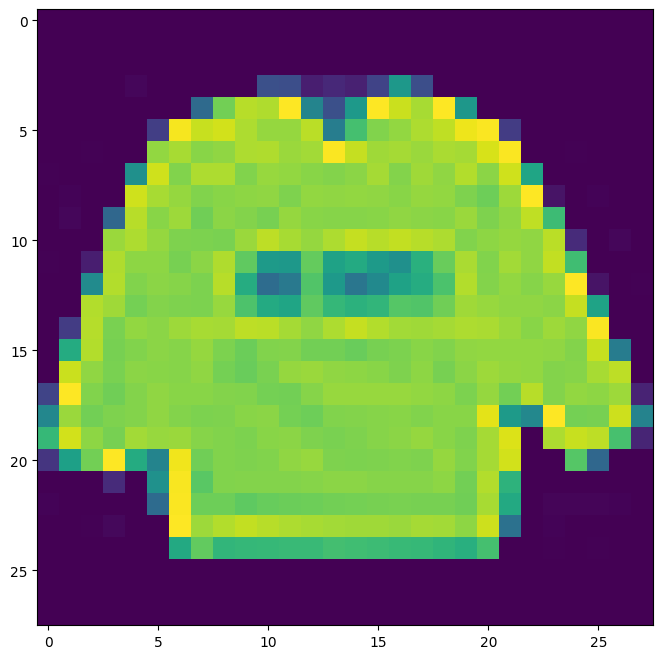

In [19]:
#Display the first row's image
display_image(X.loc[0].values, Y.loc[0])
#.loc allosws you to access sepcific rows and columns based on their labels

Class: T-shirt / Top


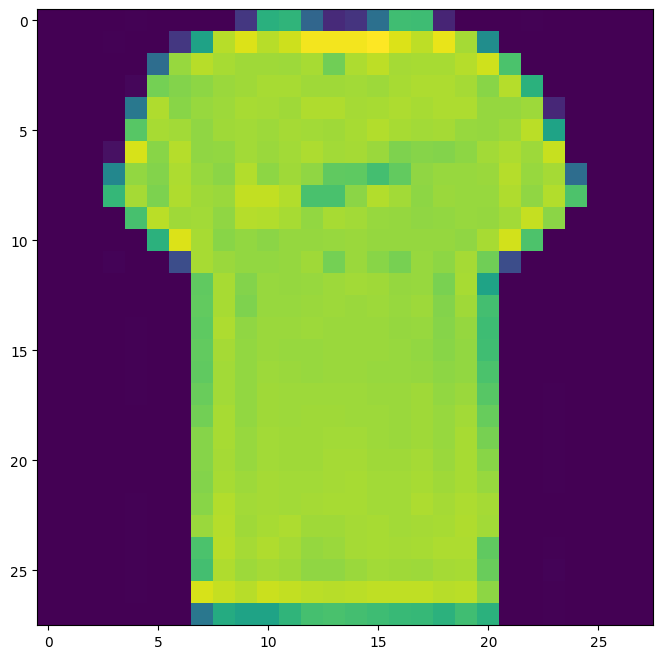

In [20]:
#Display the 10th row's image
display_image(X.loc[10].values, Y.loc[10])

Class: Sneaker


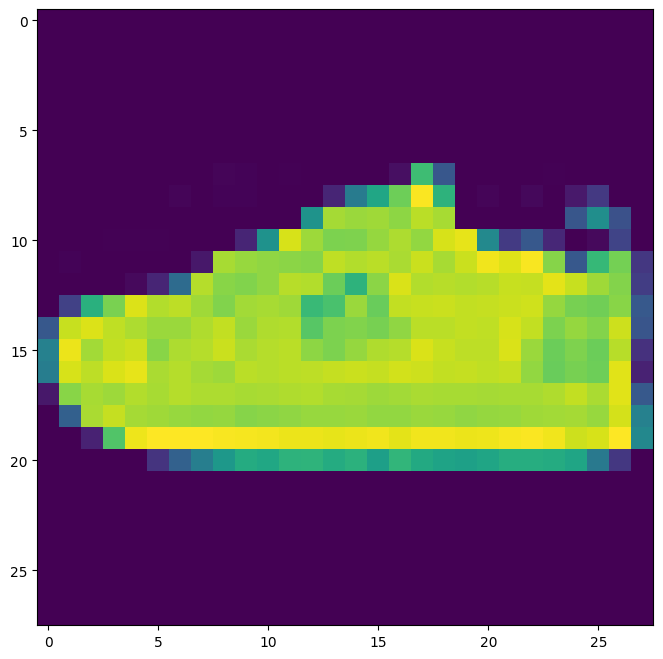

In [21]:
#Display the 59999th row's image
display_image(X.loc[59999].values, Y.loc[59999])

## Step 7: Normalize the feature matrix x

In [22]:
#Normalize x by diving the maximum image value 255
X = X / 255
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


## Conclusion:
Normalize the feature matrix 'X by divding it by 255 (maximum value for image data is 255) to scale the pixel values between 0 and 1.

## Step 8: Split the dataset into 80% training dataset and 20% validation dataset

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train.shape

(48000, 784)

In [24]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
7343,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.000000,0.019608,...,0.356863,0.329412,0.337255,0.321569,0.282353,0.121569,0.0,0.0,0.0,0.0
339,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
51857,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.152941,0.262745,0.223529,0.192157,0.0,0.0,0.0,0.0
53344,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11981,0.0,0.0,0.0,0.0,0.0,0.0,0.050980,0.301961,0.541176,0.000000,...,0.301961,0.113725,0.019608,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [25]:
x_train.shape

(48000, 784)

In [26]:
y_train.shape

(48000,)

In [27]:
x_test.shape

(12000, 784)

In [28]:
y_test.shape

(12000,)

## Conclusion:
Split the dataset into 80% training dataset and 20% validation dataset. There is 48000 rows of training dataset and 12000 rows of validation dataset.

## Step 9: Apply iterations to 50, 100, 200, 1000 and check the predict result

In [29]:
for iterations in [50, 100, 200, 1000]:
    logistic_model = LogisticRegression(max_iter = iterations, random_state = 42)
    logistic_model.fit(x_train, y_train)
    y_pred = logistic_model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred, normalize = True)
    accuracy_count = accuracy_score(y_test, y_pred, normalize = False)
    precision = precision_score(y_test, y_pred, average = 'weighted')
    recall = recall_score(y_test, y_pred, average = 'weighted')

    print("Number of test records:\t", len(y_test))
    print("Accuracy count:\t\t", accuracy_count)
    print("Acccuracy:\t\t", accuracy)
    print("Precision:\t\t", precision)
    print("Recall:\t\t\t", recall)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of test records:	 12000
Accuracy count:		 10104
Acccuracy:		 0.842
Precision:		 0.8410870134951459
Recall:			 0.842


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of test records:	 12000
Accuracy count:		 10227
Acccuracy:		 0.85225
Precision:		 0.8512124707873467
Recall:			 0.85225


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Number of test records:	 12000
Accuracy count:		 10205
Acccuracy:		 0.8504166666666667
Precision:		 0.8492458649744012
Recall:			 0.8504166666666667
Number of test records:	 12000
Accuracy count:		 10196
Acccuracy:		 0.8496666666666667
Precision:		 0.8487414070860171
Recall:			 0.8496666666666667


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Conclusion:
I tried different iterations 1, 10, 50, 100, 200 for this logictic regression model. From the result, we can see that when iteration = 100, it has the highest accuracy: 0.858, precision = 0.857, recall = 0.858, when iteration > 100, for 12000 records, the accuracy count is 10326. The accuracy, precision and recall are not increasing anymore.